# Generative Classification Models

Suppose that a qualitative response variable $Y$ can fall into either one of $K$ distinct classes where $K\geq2$. Let $\pi_{k}$ be the prior probability that an observation comes from the $k\text{th}$ class and $f_{k}(X)=Pr(X|Y=k)$ is the probability density function (PDF) of the variable $X$ for an observation $Y$ belonging to the $k\text{th}$ class. From Bayes' theorem, we have the probability that an observation $Y$ belongs to the $k\text{th}$ class given its predictor $X$:

$p_{k}(x)=Pr(Y=k|X=x)=\dfrac{\pi_{k}f_{k}(x)}{\sum_{l=1}^{K}\pi_{l}f_{l}(x)}$

We will discuss the following classifiers that provide reasonably good estimates of $f_{k}(x)$ with the aim of approximating the Bayes classifier above:
1. Linear Discriminant Analysis
2. Quadratic Discriminant Analysis
3. Naive Bayes

# 1. Linear Discriminant Analysis
Recall that we use the letter $p$ to indicate the number of predictors (X). Suppose now that we only have one predictor so that $p=1$. Our goal is now to find an estimate for $f_{k}(x)$ keeping in mind the following assumptions:
1. $f_{k}(x)$ is either normal or Gaussian. Recall that if $f_{k}(x)$ is normal, then

$f_{k}(x)=\dfrac{1}{\sqrt{2\pi}\sigma_{k}}\exp\Bigg(-\dfrac{1}{2\sigma_{k}^{2}}(x-\mu_{k})^{2}\Bigg)$

2. The variance parameters are equal across all classes, so $\sigma_{1}^{2}=\sigma_{2}^{2}=...=\sigma_{k}^{2}=\sigma^{2}$

Therefore the Bayes classifier becomes

$p_{k}(x)=Pr(Y=k|X=x)=\dfrac{\pi_{k}\dfrac{1}{\sqrt{2\pi}\sigma}\exp\Bigg(-\dfrac{1}{2\sigma^{2}}(x-\mu_{k})^{2}\Bigg)}{\sum_{l=1}^{K}\pi_{l}\dfrac{1}{\sqrt{2\pi}\sigma}\exp\Bigg(-\dfrac{1}{2\sigma^{2}}(x-\mu_{l})^{2}\Bigg)}$

If we take the log of this equation and rearrange some terms we can show that the result which is called the discriminant function $\delta$ is equal to assigning an observation $X=x$ to the class for which $p_{k}(x)$ is largest which is what the Bayes classifier does. So that is equivalent to assigning an observation to the class for which the discriminant function below is largest:

$\delta_{k}(x)=x\dfrac{\mu_{k}}{\sigma^{2}}-\dfrac{\mu_{k}^{2}}{2\sigma^{2}}+\log(\pi_{k})$

##### Example:
Suppose we have two classes so that $K=2$ and two density functions with $\mu_{l}=-1.25$, $\mu_{2}=+1.25$ and $\sigma^{2}=1$. The Bayes classifier then assigns an observation to class 1 if $2x(\mu_{1}-\mu_{2})>\mu_{1}^{2}-\mu_{2}^{2}$ and to class 2 otherwise. The Bayes decision boundary is the point at which $\delta_{1}(x)=\delta_{2}(x)$ which is given by

$x=\dfrac{\mu_{1}+\mu_{2}}{2}=\dfrac{-1.25 + 1.25}{0}=0$

This can then be seen visually below:

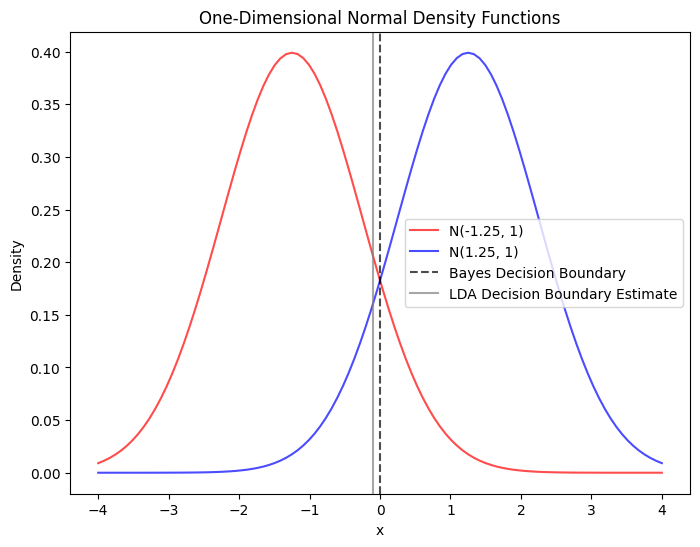

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x_range = np.linspace(-4, 4, 100)

mean_1 = -1.25
mean_2 = 1.25
variance = 1

pdf_1 = norm.pdf(x_range, loc=mean_1, scale=np.sqrt(variance))
pdf_2 = norm.pdf(x_range, loc=mean_2, scale=np.sqrt(variance))

plt.figure(figsize=(8, 6))
plt.plot(x_range, pdf_1, color='red', label='N(-1.25, 1)', alpha=0.7)
plt.plot(x_range, pdf_2, color='blue', label='N(1.25, 1)', alpha=0.7)
plt.axvline(x=0, color = 'black', linestyle='--', label='Bayes Decision Boundary', alpha=0.7)
plt.axvline(x=-0.1, color = 'gray', linestyle='-', label='LDA Decision Boundary Estimate', alpha=0.7)
plt.legend()
plt.title('One-Dimensional Normal Density Functions')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

In practice, the LDA method approximates the Bayes classifier by substituting estimated values of $\pi_{k}$, $\mu_{k}$ and $\sigma^{2}$ into $\delta_{k}(x)$ by using the following

$\displaystyle{\widehat{\mu}_{k}=\dfrac{1}{n_{k}}}\sum_{i:y_{i}=k}x_{i}$ and  $\displaystyle{\widehat{\sigma}^{2}=\dfrac{1}{n-K}}\sum_{k=1}^{K}\sum_{i:y_{i}=k}(x_{i}-\widehat{\mu}_{k})^{2}$

where $n$ is the total number of training observations and $n_{k}$ is the total number of training observations from the $kth$ class. Furthermore, LDA approximates $\widehat{\pi}_{k}=n_{k}/n$

##### LDA for p>1:
So far we have only covered the case for one predictor, however it is entirely possible to have multiple predictors. In such a case we assume that $X=(X_{1}, X_{2}, ... , X_{p})$ follows a multivariate normal/Gaussian distribution with a class-specific mean vector and a common covariance matrix.

In this case, if $X$ is a $p$-dimensional random variable that follows a multivariate Gaussian distribution, we have that $X\sim N(\mu, \Sigma)$ where the expectation is $E(X)=\mu$ and $Cov(X)=\Sigma$ which is the $p\times p$ covariance matrix of $X$. The probability density function is defined as

$f(x)=\dfrac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}\exp\Bigg({-\dfrac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu)}\Bigg)$

The discriminant function is then defined as

$\delta_{k}(x)=x^{T}\Sigma^{-1}\mu_{k}-\dfrac{1}{2}\mu_{k}^{T}\Sigma^{-1}\mu_{k}+\log{\pi_{k}}$